## Using the Supervised Tuning Methods

This notebook contains examples on how to use the supervised_tuner module. Although the examples are for classification problems the same principles can be used for regression problems. Note both the eval_model() and tune_test_model() functions return dictionaries containing containing: 

- 'model': final model fit (full data refit for param tuning and final cv data fit for eval) 
- 'metrics': dictionary containing key (metric) value (list of cv score) pairs during model eval
- 'fin_cv_df': final cv data with predictions
- 'params': parameters of model  
- 'features': list of features used in model fitting
- 'log_data': empty dictionary if no log wanted, else all data that is to be logged 

The following classification and regression methods are currently fully supported (parameter to pass in: sklearn model initiated):

In [10]:
from eagles.Supervised import model_support

model_support.print_classifiers()
print('\n')
model_support.print_regressors()

Supoorted Classification Models


,Abbreviation,Model
0,rf_clf,RandomForestClassifier
1,et_clf,ExtraTreesClassifier
2,gb_clf,GradientBoostingClassifier
3,dt_clf,DecisionTreeClassifier
4,logistic,LogisticRegression
5,svc,SVC
6,knn_clf,KNeighborsClassifier
7,nn,MLPClassifier
8,ada_clf,AdaBoostClassifier
9,vc_clf,VotingClassifier


Voting Classifier Defaults: Random Forest Classifier x Logistic Regression

Classification Metrics:
['accuracy', 'f1', 'precision', 'recall', 'roc_auc', 'precision_recall_auc']


Supoorted Regression Models


,Abbreviation,Model
0,rf_regress,RandomForestRegressor
1,et_regress,ExtraTreesRegressor
2,gb_regress,GradientBoostingRegressor
3,dt_regress,DecisionTreeRegressor
4,linear,LinearRegression
5,lasso,Lasso
6,elastic,ElasticNet
7,svr,SVR
8,knn_regress,KNeighborsRegressor
9,ada_regress,AdaBoostRegressor


Voting Regressor Defaults: Random Forest Regressor x Linear Regression

Regressor Metrics:
['mse', 'rmse', 'mae', 'mape', 'r2']


In [11]:
from eagles.Supervised import supervised_tuner as st
from eagles.data_sets import data_loader as dl

Load in the iris dataset for classification and regression tuning examples

In [12]:
iris = dl.load_iris()

# create a dummy ft for the 
iris['dummy'] = iris['species'].apply(lambda x: 1 if x =='setosa' else 0)

# define the feature columns
fts = [ft for ft in iris.columns if ft != 'species' and ft != 'dummy']

print(iris.shape)

(150, 6)


## Binary Classification with logistic regression

Random Seed Value: 4
Performing CV Runs: 5
Finished cv run: 1 time: 0.0209
Finished cv run: 2 time: 0.017
Finished cv run: 3 time: 0.0149
Finished cv run: 4 time: 0.017
Finished cv run: 5 time: 0.0129

CV Run Scores
accuracy scores: [1. 1. 1. 1. 1.]
accuracy mean: 1.0
accuracy standard deviation: 0.0 

f1 scores: [1. 1. 1. 1. 1.]
f1 mean: 1.0
f1 standard deviation: 0.0 

roc_auc scores: [1. 1. 1. 1. 1.]
roc_auc mean: 1.0
roc_auc standard deviation: 0.0 

Final cv train test split
accuracy score: 1.0
f1 score: 1.0
roc_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",20,0.0
5,"(0.05, 0.1]",0,NaN
2,"(0.1, 0.15]",1,0.0
6,"(0.15, 0.2]",0,NaN
7,"(0.2, 0.25]",0,NaN
8,"(0.25, 0.3]",0,NaN
9,"(0.3, 0.35]",0,NaN
10,"(0.35, 0.4]",0,NaN
4,"(0.4, 0.45]",0,NaN


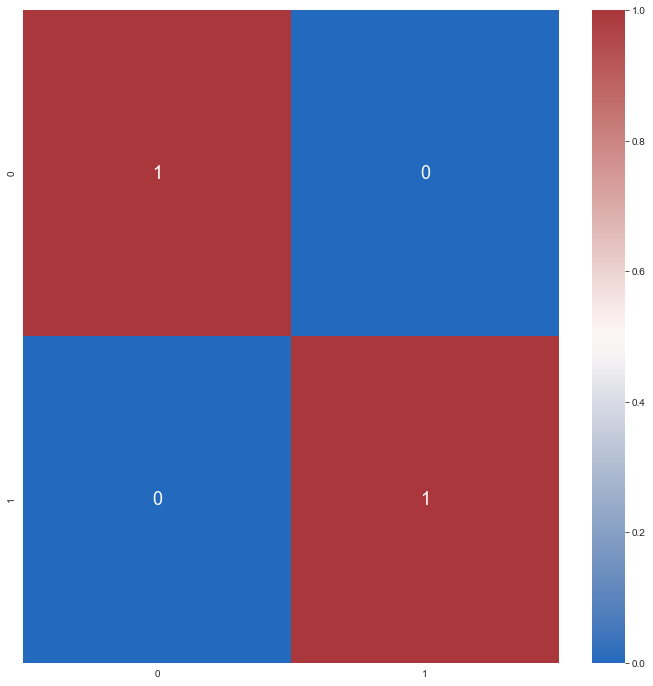

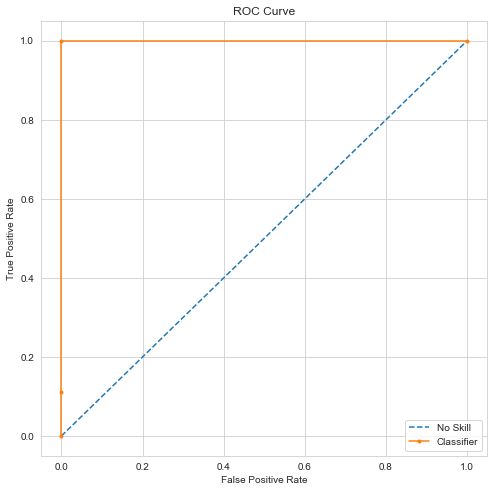

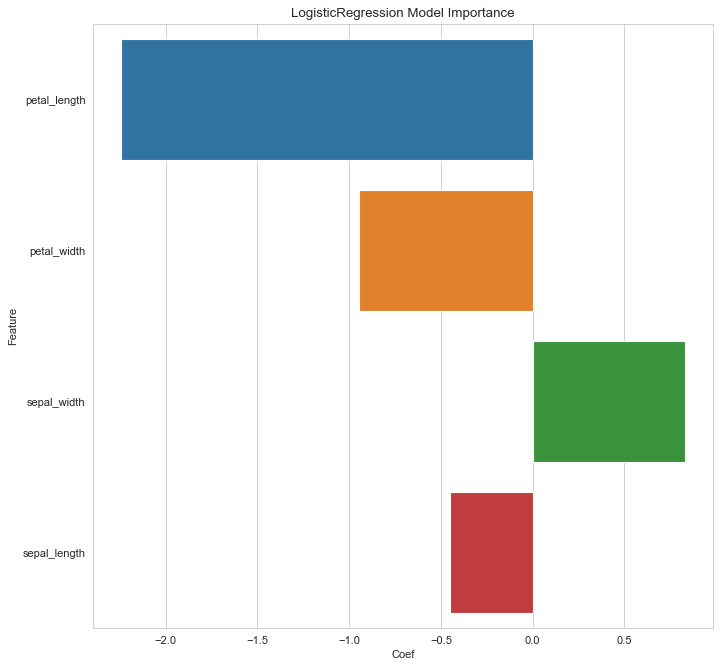

In [13]:
res = st.model_eval(
    X=iris[fts],
    y=iris['dummy'],
    model='logistic',
    params={'solver':'liblinear'},
    metrics=["accuracy", "f1", "roc_auc"],
    bins=None,
    pipe=None,
    scale=None,
    num_top_fts=None,
    num_cv=5,
    get_ft_imp=True,
    random_seed=4,
    binary=True,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function"
)


## Model Eval Using the scale parameter

Random Seed Value: 4
Performing CV Runs: 5
Finished cv run: 1 time: 0.02
Finished cv run: 2 time: 0.0155
Finished cv run: 3 time: 0.0162
Finished cv run: 4 time: 0.014
Finished cv run: 5 time: 0.014

CV Run Scores
accuracy scores: [1. 1. 1. 1. 1.]
accuracy mean: 1.0
accuracy standard deviation: 0.0 

f1 scores: [1. 1. 1. 1. 1.]
f1 mean: 1.0
f1 standard deviation: 0.0 

roc_auc scores: [1. 1. 1. 1. 1.]
roc_auc mean: 1.0
roc_auc standard deviation: 0.0 

Final cv train test split
accuracy score: 1.0
f1 score: 1.0
roc_auc score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",20,0.0
4,"(0.05, 0.1]",0,NaN
2,"(0.1, 0.15]",1,0.0
5,"(0.15, 0.2]",0,NaN
6,"(0.2, 0.25]",0,NaN
7,"(0.25, 0.3]",0,NaN
8,"(0.3, 0.35]",0,NaN
9,"(0.35, 0.4]",0,NaN
3,"(0.4, 0.45]",0,NaN


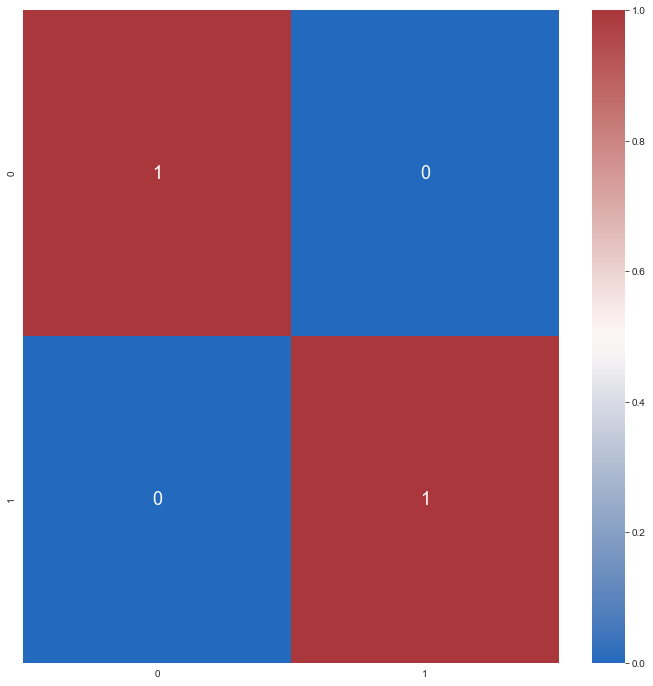

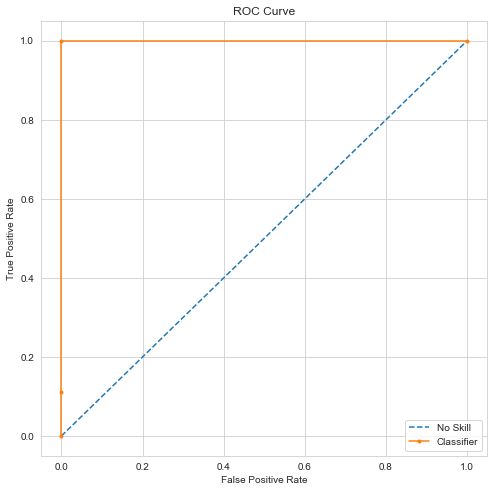

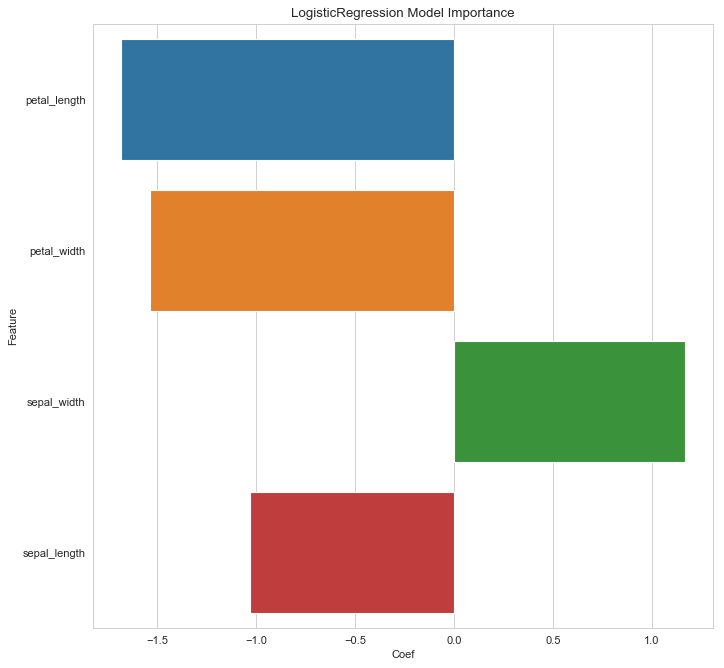

In [14]:
res = st.model_eval(
    X=iris[fts],
    y=iris['dummy'],
    model='logistic',
    params={'solver':'liblinear'},
    metrics=["accuracy", "f1", "roc_auc"],
    bins=None,
    pipe=None,
    scale="standard",
    num_top_fts=None,
    num_cv=5,
    get_ft_imp=True,
    random_seed=4,
    binary=True,
    disp=True,
    log="log",
    log_name="model_eval_test.txt",
    log_path=None,
    log_note="This is a test of the model eval function"
)

## Multi-Class Classification

Random Seed Value: 4
Performing CV Runs: 5
Finished cv run: 1 time: 0.2045
Finished cv run: 2 time: 0.1576
Finished cv run: 3 time: 0.1596
Finished cv run: 4 time: 0.1925
Finished cv run: 5 time: 0.1655

CV Run Scores
f1 scores: [0.9454191  0.96705882 0.91304348 0.96705882 0.96796339]
f1 mean: 0.9521
f1 standard deviation: 0.0213 

precision scores: [0.96666667 0.97435897 0.91414141 0.96296296 0.96666667]
precision mean: 0.957
precision standard deviation: 0.0217 

Final cv train test split
f1 score: 0.968
precision score: 0.9667
 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



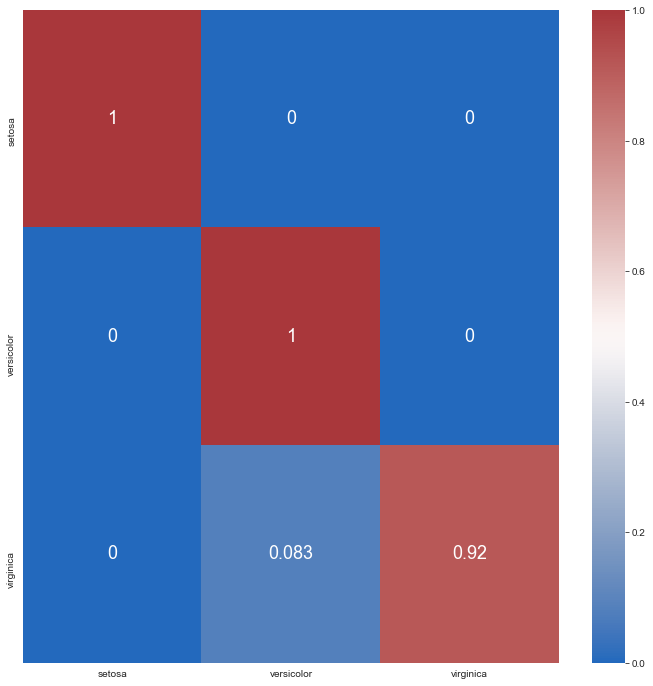

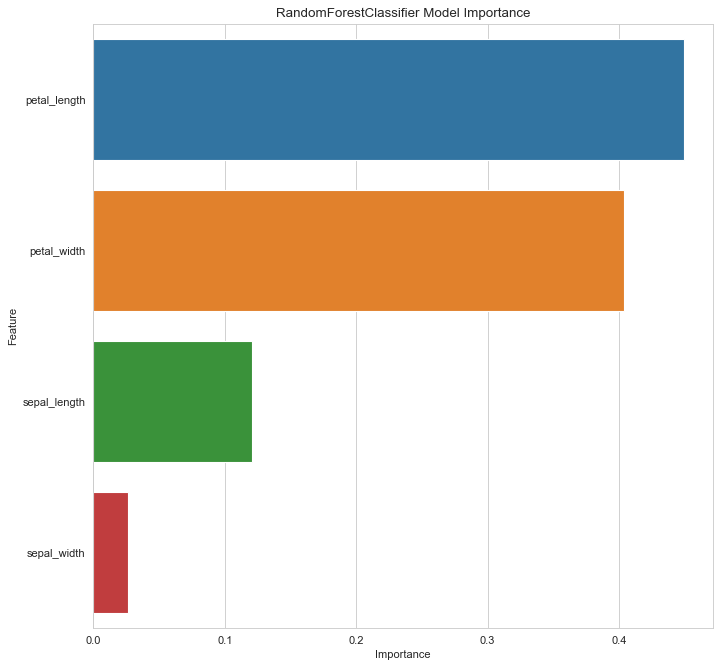

In [15]:
res = st.model_eval(
    X=iris[fts],
    y=iris['species'],
    model='rf_clf',
    params={'n_estimators':100, 'max_depth':10},
    metrics=["f1", "precision"],
    bins=None,
    pipe=None,
    scale=None,
    num_top_fts=None,
    num_cv=5,
    get_ft_imp=True,
    random_seed=4,
    binary=False,
    disp=True
)


## Classification Model Tuning Passing in a pipeline for feature selection

Random Seed Value: 250
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.1s finished


Mean cross val f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

LogisticRegression Parameters
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 250, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Performing model eval on best estimator
Random Seed Value: 250
Performing CV Runs: 5
Finished cv run: 1 time: 0.014
Finished cv run: 2 time: 0.017
Finished cv run: 3 time: 0.012
Finished cv run: 4 time: 0.012
Finished cv run: 5 time: 0.014

CV Run Scores
accuracy scores: [1. 1. 1. 1. 1.]
accuracy mean: 1.0
accuracy standard deviation: 0.0 

f1 scores: [1. 1. 1. 1. 1.]
f1 mean: 1.0
f1 standard deviation: 0.0 

Final cv train test split
accuracy score: 1.0
f1 score: 1.0
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21


,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",21,0.0
4,"(0.05, 0.1]",0,NaN
5,"(0.1, 0.15]",0,NaN
6,"(0.15, 0.2]",0,NaN
7,"(0.2, 0.25]",0,NaN
8,"(0.25, 0.3]",0,NaN
9,"(0.3, 0.35]",0,NaN
10,"(0.35, 0.4]",0,NaN
3,"(0.4, 0.45]",0,NaN


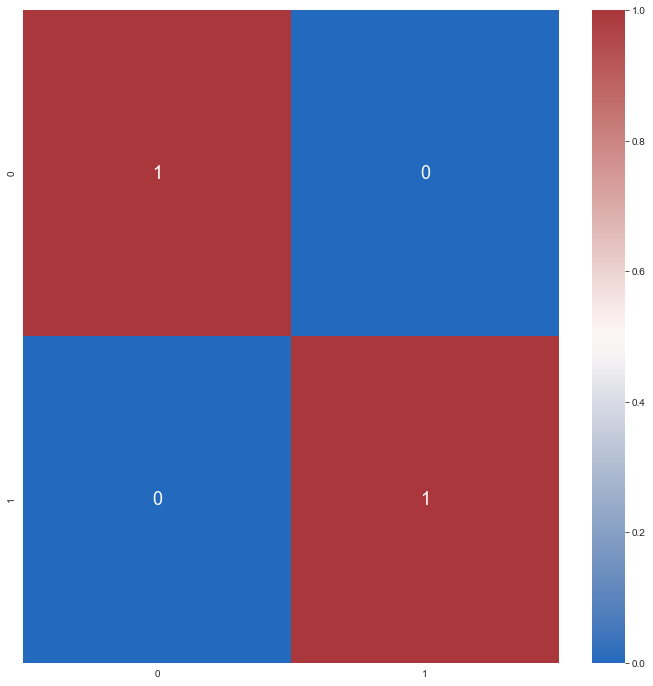

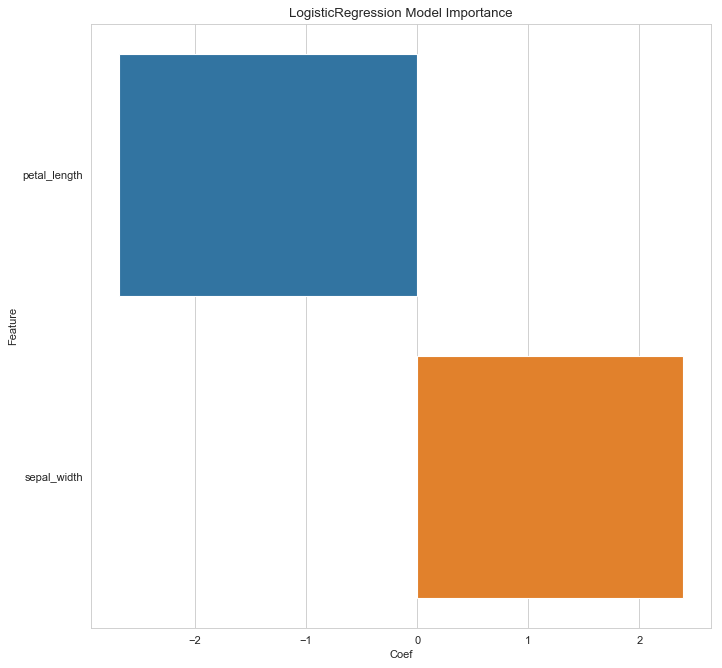

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

pars = {'solver': ['liblinear']
       , 'penalty':['l1','l2']
       , 'max_iter':[100, 300, 500]
       }

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)

pipe = Pipeline([('feature_selection', SelectFromModel(lsvc, prefit=False))])

res = st.tune_test_model(X=iris[fts],
                        y=iris['dummy'],
                        model='logistic',
                        params=pars,
                        tune_metric="f1",
                        eval_metrics=["accuracy", "f1"],
                        num_cv=5,
                        pipe=pipe,
                        scale=None,
                        select_features=None,
                        bins=None,
                        num_top_fts=None,
                        tuner="grid_cv",
                        n_iterations=15,
                        get_ft_imp=True,
                        n_jobs=2,
                        random_seed=None,
                        binary=True,
                        disp=True,
                        log="log",
                        log_name="model_tunetest_test.txt",
                        log_path=None,
                        log_note="This is a test of the tune test function"
                    )

## Classification Model Parameter Tuning using tuner utils feature selection
Note feature selection happens pre grid search and is not implemented within a pipeline

Random Seed Value: 525
Selecting features
Init number of features: 4 

Features dropping due to high correlation: ['petal_width'] 

Features dropping from l1 regression: ['sepal_length'] 

Final number of fts : 2
 

Final features: ['sepal_width', 'petal_length']
 

Dropped features: ['petal_width', 'sepal_length']
 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.0s finished


Mean cross val f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

LogisticRegression Parameters
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 525, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Performing model eval on best estimator
Random Seed Value: 525
Performing CV Runs: 5
Finished cv run: 1 time: 0.013
Finished cv run: 2 time: 0.01
Finished cv run: 3 time: 0.008
Finished cv run: 4 time: 0.008
Finished cv run: 5 time: 0.008

CV Run Scores
accuracy scores: [1. 1. 1. 1. 1.]
accuracy mean: 1.0
accuracy standard deviation: 0.0 

f1 scores: [1. 1. 1. 1. 1.]
f1 mean: 1.0
f1 standard deviation: 0.0 

precision_recall_auc scores: [1. 1. 1. 1. 1.]
precision_recall_auc mean: 1.0
precision_recall_auc standard deviation: 0.0 

Final cv train test split
accuracy score: 1.0
f1 

,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
0,"(0.0, 0.05]",17,0.0
3,"(0.05, 0.1]",0,NaN
4,"(0.1, 0.15]",0,NaN
5,"(0.15, 0.2]",0,NaN
6,"(0.2, 0.25]",0,NaN
7,"(0.25, 0.3]",0,NaN
8,"(0.3, 0.35]",0,NaN
9,"(0.35, 0.4]",0,NaN
2,"(0.4, 0.45]",0,NaN


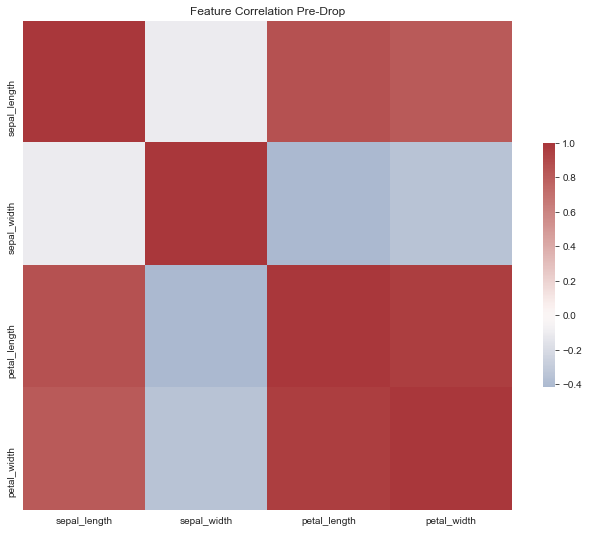

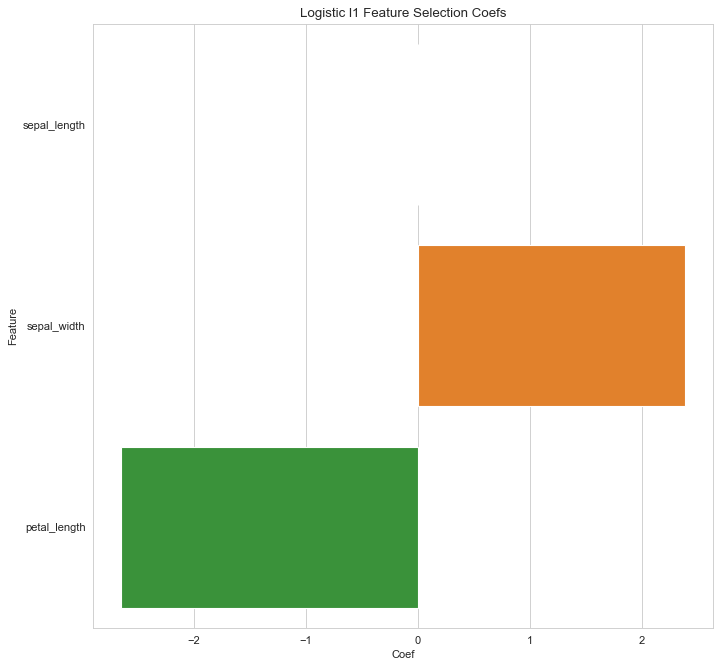

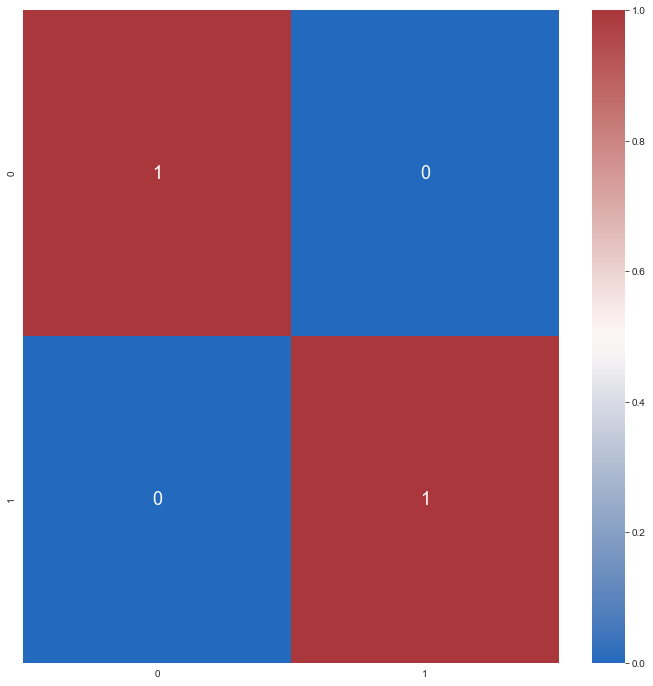

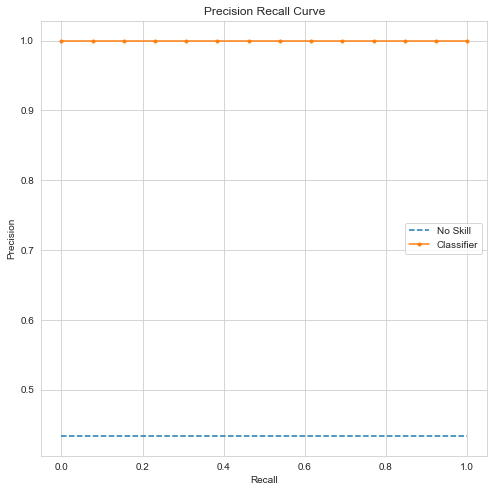

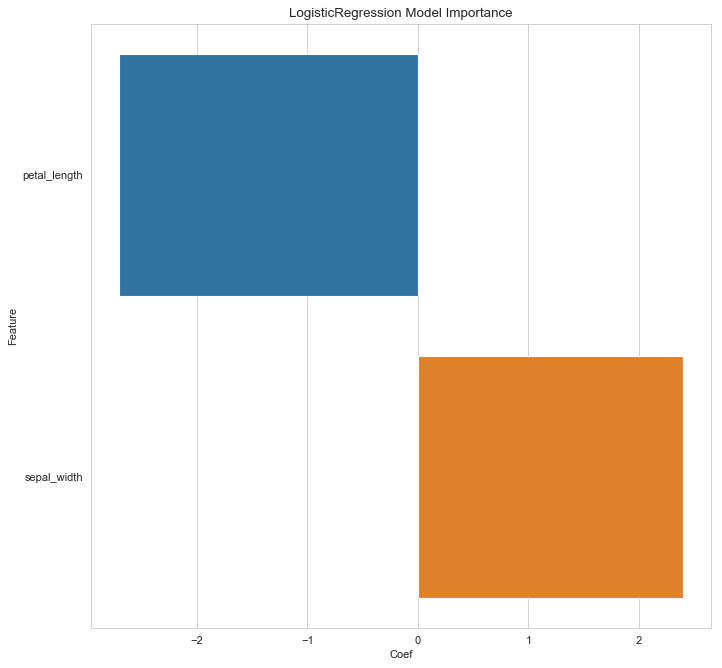

In [17]:
select_features_dict = {
    'methods':['correlation', 'regress'],
    'imp_thresh':.005,
    'corr_thresh':.9,
    'bin_fts':[],
    'dont_drop':None,
    'model_pipe':None,
    'plot_ft_importance':True,
    'plot_ft_corr':True

}

pars = {'solver': ['liblinear']
       , 'penalty':['l1','l2']
       , 'max_iter':[100, 300, 500]
       }

res = st.tune_test_model(X=iris[fts],
                        y=iris['dummy'],
                        model='logistic',
                        params=pars,
                        tune_metric="f1",
                        eval_metrics=["accuracy", "f1", "precision_recall_auc"],
                        num_cv=5,
                        pipe=None,
                        scale=None,
                        select_features=select_features_dict,
                        bins=None,
                        num_top_fts=None,
                        tuner="grid_cv",
                        n_iterations=15,
                        get_ft_imp=True,
                        n_jobs=2,
                        random_seed=None,
                        binary=True,
                        disp=True,
                        log="log",
                        log_name="model_tunetest_test.txt",
                        log_path=None,
                        log_note="This is a test of the tune test function"
                    )

## Voting Classifier with embedded pipelines

Random Seed Value: 68
Selecting features
Init number of features: 4 

Features dropping due to high correlation: ['petal_width'] 

Features dropping from l1 regression: ['sepal_length'] 

Final number of fts : 2
 

Final features: ['sepal_width', 'petal_length']
 

Dropped features: ['petal_width', 'sepal_length']
 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done  75 out of  75 | elapsed:   12.7s finished


Mean cross val f1 score of best estimator during parameter tuning: 1.0

Parameters of the best model: 

VotingClassifier weights: [2, 1]

RandomForestClassifier Parameters
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': None, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}

LogisticRegression Parameters
{'C': 0.25, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 4, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Performing model eval on best estimator
Random Seed Value: 68
Performing CV Ru

,probab_bin,count,percent_actual
20,"(-0.05, 0.0]",0,NaN
4,"(0.0, 0.05]",1,0.0
0,"(0.05, 0.1]",11,0.0
1,"(0.1, 0.15]",8,0.0
8,"(0.15, 0.2]",0,NaN
9,"(0.2, 0.25]",0,NaN
10,"(0.25, 0.3]",0,NaN
11,"(0.3, 0.35]",0,NaN
7,"(0.35, 0.4]",0,NaN
13,"(0.4, 0.45]",0,NaN


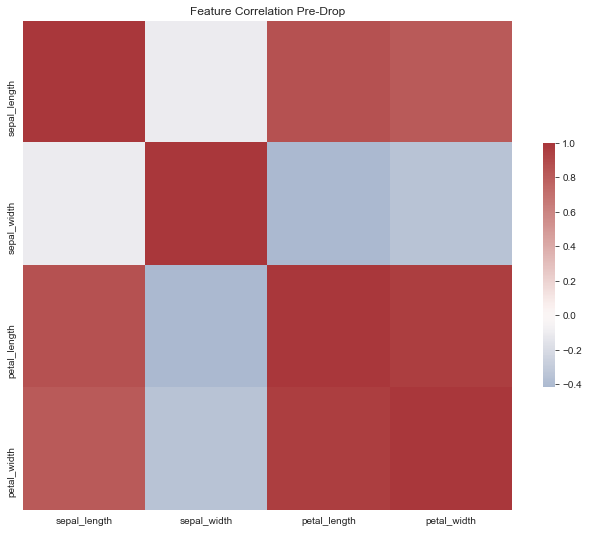

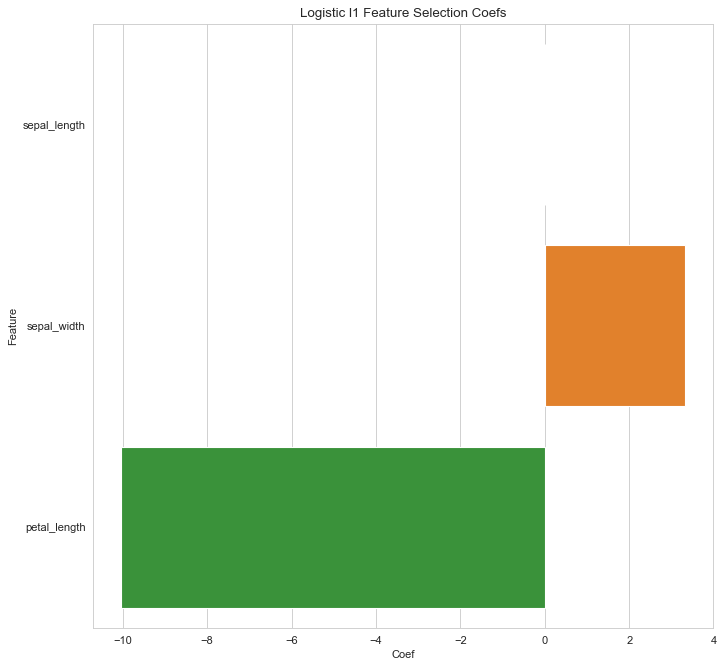

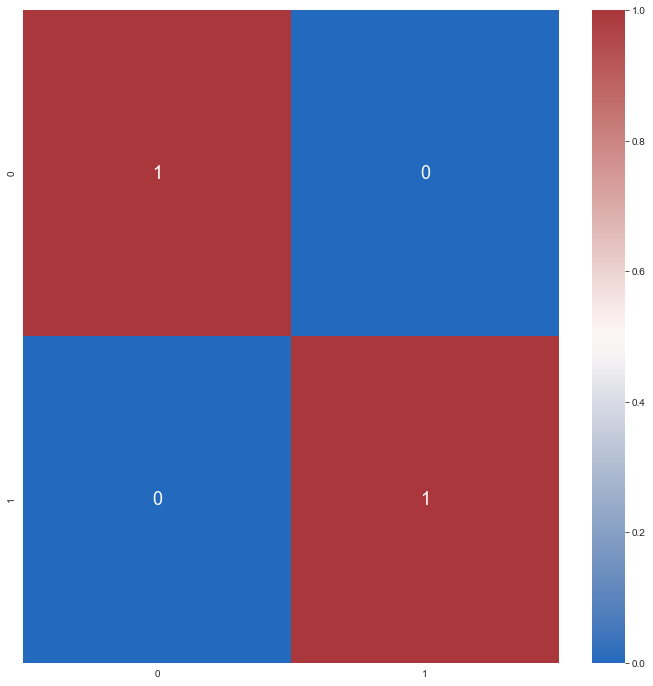

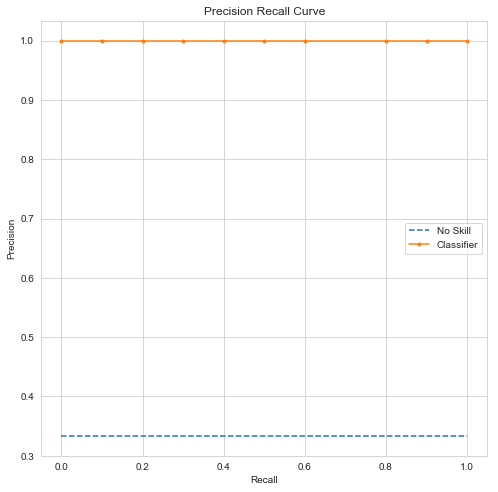

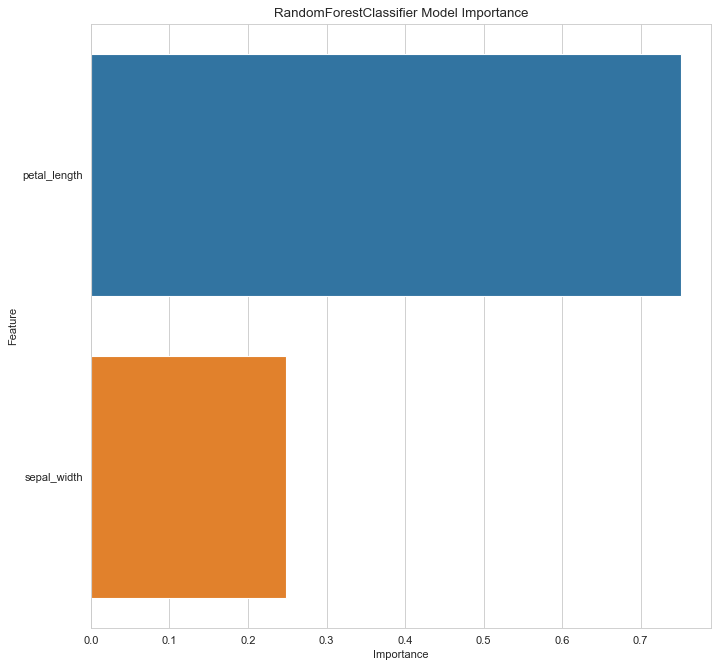

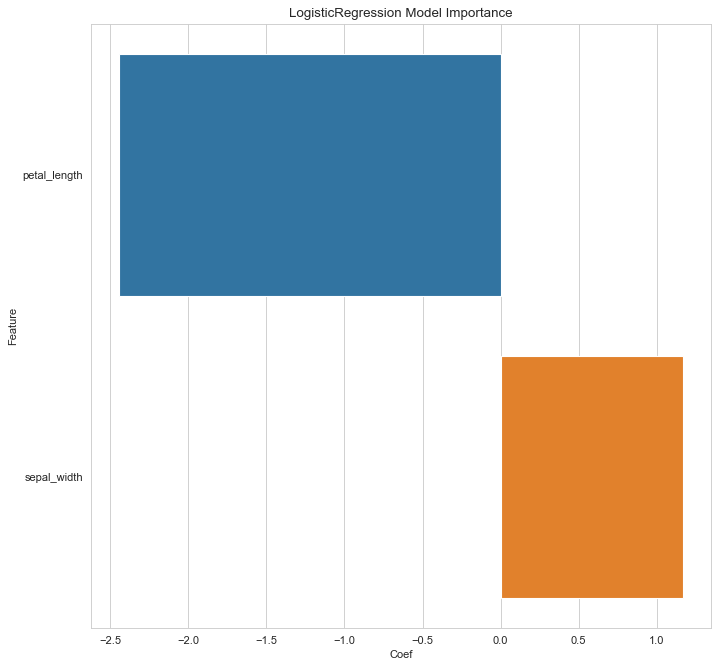

In [18]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

note = """
Voting Classifier with base lr and rf

grid search tuning for f1 for species setsoa

For missing values used median fills with imputer. 

regress and corr feature select
"""


# Define the initial steps of the pipeline (i.e. impute and scaling strategy)
select_ft_model_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                       ,('scale', MinMaxScaler())]
                     )

# Define the feature selection parameters
select_features_dict = {'methods':['regress', 'correlation']
                       ,'imp_thresh':.005
                       ,'corr_thresh':.9
                       ,'bin_fts':[]
                       ,'dont_drop':None
                       ,'model_pipe':select_ft_model_pipe
                       ,'plot_ft_importance':True
                       ,'plot_ft_corr':True
                       }


# Define the models  
rf_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('clf', RandomForestClassifier())
                   ])

lr_pipe = Pipeline([('impute', SimpleImputer(strategy='median'))
                    ,('scale', MinMaxScaler())
                    ,('clf', LogisticRegression())
                   ])


vc_clf = VotingClassifier(estimators=[('rf', rf_pipe)
                                      ,('lr', lr_pipe)]
                          , voting='soft')



pars = {'rf__clf__n_estimators':[x for x in range(100,300,50)]
        ,'rf__clf__max_depth':[10, 20]
        ,'rf__clf__class_weight': [None, 'balanced_subsample']
        ,'rf__clf__random_state':[4]

        ,'lr__clf__penalty': ['l2']
        ,'lr__clf__class_weight':[None, 'balanced']
        ,'lr__clf__max_iter':[1000]
        ,'lr__clf__C': [.25]
        ,'lr__clf__solver':['liblinear']
        ,'lr__clf__random_state':[4] 

        ,'weights':[[1,1],[1,2],[2,1]] 
       }


res = st.tune_test_model(X=iris[fts]
                        ,y=iris['dummy']
                        ,model=vc_clf
                        ,params=pars
                        ,tune_metric="f1"
                        ,eval_metrics=["accuracy", "f1", "precision", "precision_recall_auc"]
                        ,num_cv=5
                        ,pipe=None
                        ,scale=None
                        ,select_features=select_features_dict
                        ,bins=None
                        ,num_top_fts=None
                        ,tuner="random_cv"
                        ,n_iterations=15
                        ,get_ft_imp=True
                        ,n_jobs=2
                        ,random_seed=None
                        ,binary=True
                        ,disp=True
                        ,log=["log","mod","data"]
                        ,log_name="model_tunetest_test.txt"
                        ,log_path=None
                        ,log_note=note)